In [8]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/FuelConsumption.csv')

In [3]:
df

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230
...,...,...,...,...,...,...,...,...,...,...
634,2000,VOLVO,V70 AWD TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,14.4,288
635,2000,VOLVO,V70 GLT TURBO,STATION WAGON - MID-SIZE,2.4,5,A4,Z,13.6,274
636,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,A4,Z,13.9,274
637,2000,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.0,260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [6]:
df['MAKE'].unique()

array(['ACURA', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHEVROLET',
       'CHRYSLER', 'DAEWOO', 'DODGE', 'FERRARI', 'FORD', 'GMC', 'HONDA',
       'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
       'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA', 'MERCEDES-BENZ',
       'NISSAN', 'OLDSMOBILE', 'PLYMOUTH', 'PONTIAC', 'PORSCHE', 'SAAB',
       'SATURN', 'SUBARU', 'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'],
      dtype=object)

In [10]:
df['VEHICLE CLASS'].unique()

array(['COMPACT', 'MID-SIZE', 'SUBCOMPACT', 'STATION WAGON - MID-SIZE',
       'MINICOMPACT', 'TWO-SEATER', 'STATION WAGON - SMALL', 'FULL-SIZE',
       'SUV', 'VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD',
       'PICKUP TRUCK - SMALL', 'MINIVAN'], dtype=object)

In [7]:
df['TRANSMISSION'].unique()

array(['A4', 'M5', 'AS5', 'AS4', 'M6', 'A5', 'A3', 'AS6'], dtype=object)

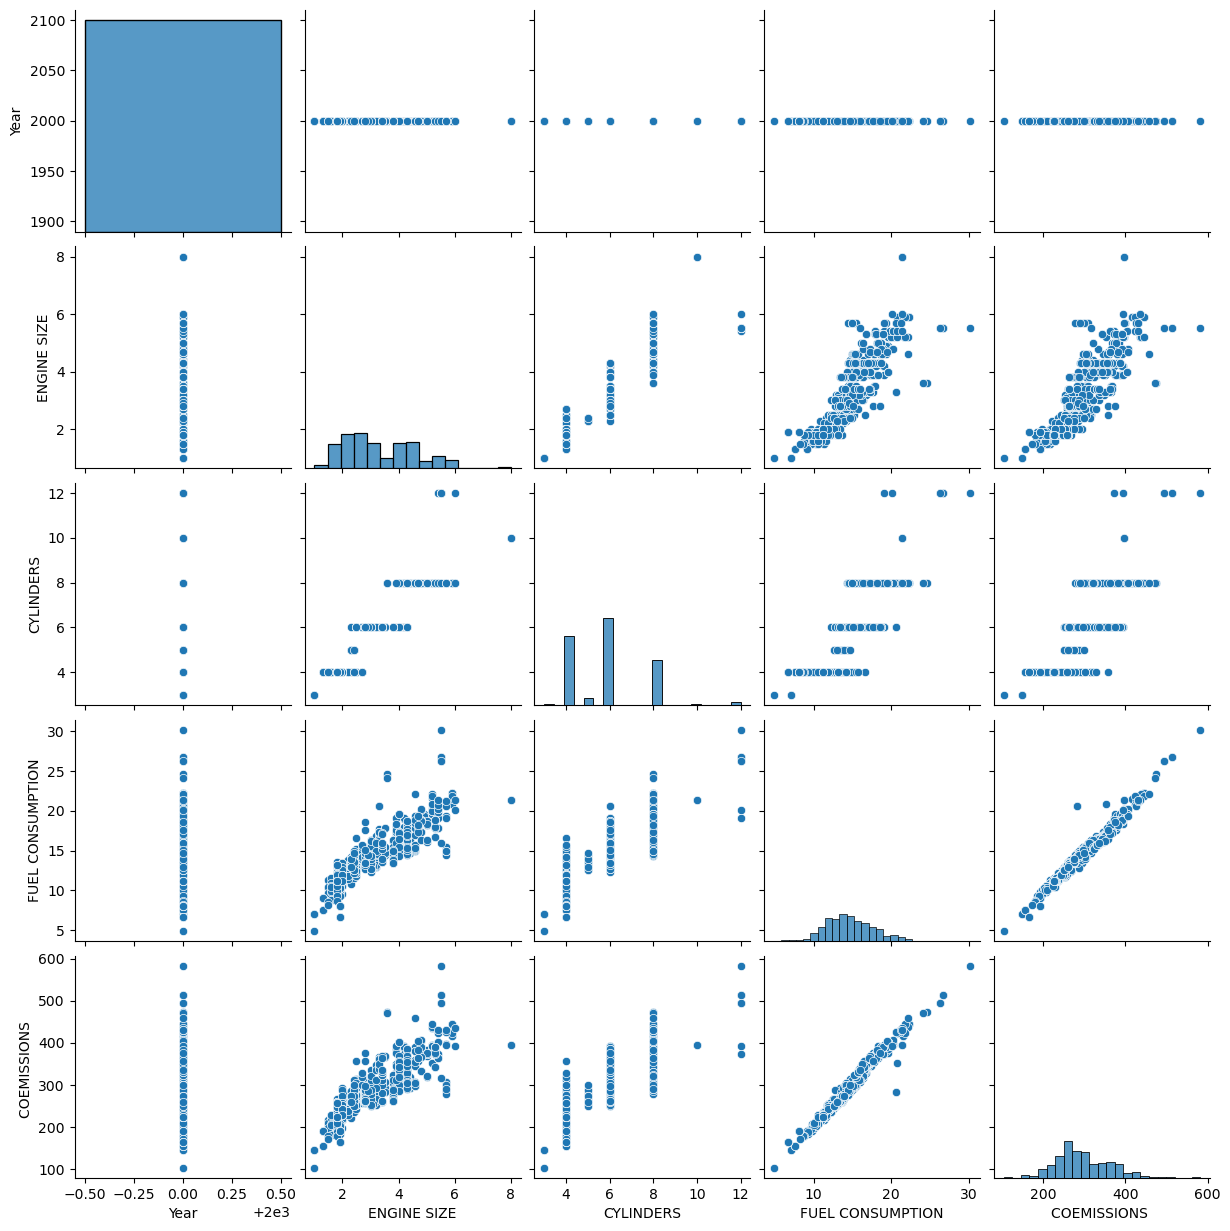

In [9]:
sns.pairplot(df)

It seems that here only engineSize, cylinders, fuelConsumption and coemission can be used for linear regression since they are the only factor with numbers in it year are not particularly necessary as we are making model for fuelConsumption and setting year as factor for fuelComsumption rate don't make sense.

<Axes: >

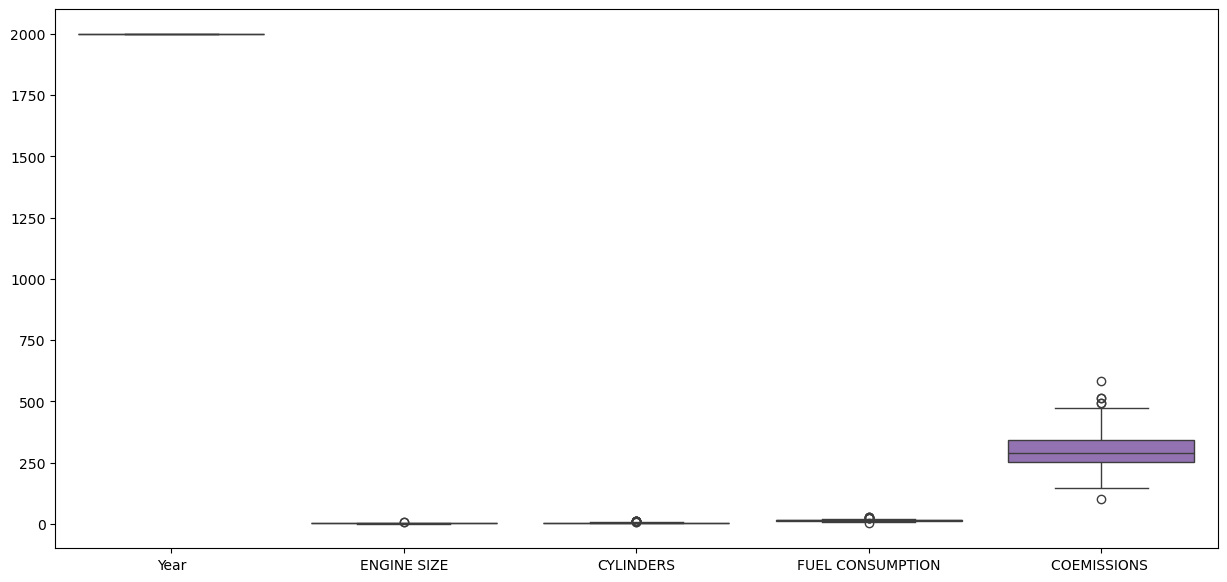

In [12]:
plt.figure(figsize=(15,7))
sns.boxplot(df)

In [39]:
df = df.drop(columns = ['Year','MAKE','MODEL','VEHICLE CLASS','ENGINE SIZE'])

In [43]:
print(df.columns)

Index(['CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION',
       'COEMISSIONS '],
      dtype='object')


In [40]:
df

,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,4,A4,X,10.5,216
1,4,M5,X,9.8,205
2,6,AS5,Z,13.7,265
3,6,A4,Z,15.0,301
4,4,A4,X,11.4,230
...,...,...,...,...,...
634,5,A4,Z,14.4,288
635,5,A4,Z,13.6,274
636,5,A4,Z,13.9,274
637,5,M5,Z,13.0,260


need to look up how to use transmission and fuel for linear model as it has more that one values and one hot encoding doesn't seems viable as it increases the data drastically.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CYLINDERS         639 non-null    int64  
 1   TRANSMISSION      639 non-null    object 
 2   FUEL              639 non-null    object 
 3   FUEL CONSUMPTION  639 non-null    float64
 4   COEMISSIONS       639 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 25.1+ KB


In [42]:
df['CYLINDERS'].unique()

array([ 4,  6,  8, 12,  3, 10,  5])

In [45]:
df.corr(numeric_only = True)

,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
CYLINDERS,1.000000,0.825784,0.798447
FUEL CONSUMPTION,0.825784,1.000000,0.983232
COEMISSIONS,0.798447,0.983232,1.000000


<Axes: >

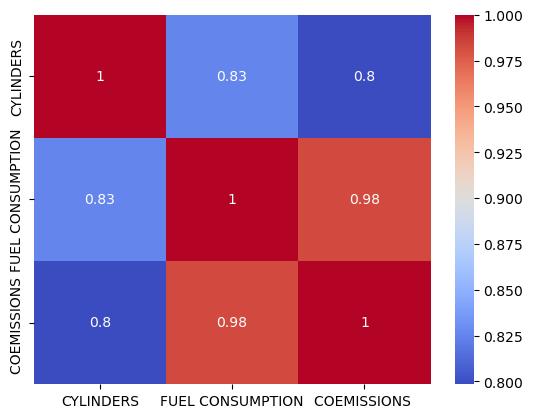

In [50]:
sns.heatmap(df.corr(numeric_only = True),annot = True, cmap = 'coolwarm')

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [56]:
inputs = df[['CYLINDERS','COEMISSIONS ']]
target = df[['FUEL CONSUMPTION']]
input_train,input_test,target_train,target_test = train_test_split(inputs,target,test_size = 0.1)

In [57]:
model = LinearRegression().fit(input_train,target_train)

prediction = model.predict(input_test)
MSE = mean_squared_error(target_test,prediction)
print("error:",MSE)

error: 0.8066053817499542


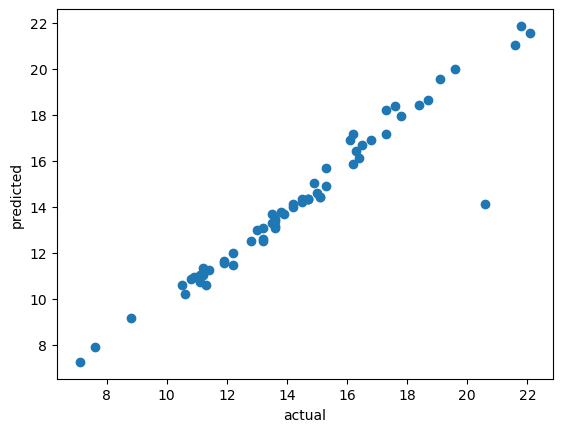

In [62]:
fig = plt.scatter(x = target_test,y =prediction)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()